Our previous bad results with the LSTM were due to how it interpreted the data we fed it.  
While each of our observaitons has 9 lage (or elements), this is not the same as an observation having 9 dimensions. However, the shape of the data was in this format.

This has been fixed, and now we'll see how the LSTMs performed.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
text_results_list = {
    1:"Lfix_20u_adam_32b_tf_results.txt",
    2:"Lfix_20u_sgd_32b_tf_results.txt",
    3:"Lfix_mixepochs_20u_adam_168b_tf_results.txt",
    4:"whocares.txt",
    5:"whocares16sgd.txt",
    6:"250AS16TF.txt"
}

In [3]:
configs_list = {
    1:("Lfix_20u_adam_32b_tf_results_01_jsconfig.json",
       "Lfix_20u_adam_32b_tf_results_02_jsconfig.json"),
    2:("Lfix_20u_sgd_32b_tf_results_01_jsconfig.json",
       "Lfix_20u_sgd_32b_tf_results_02_jsconfig.json"),
    3:("Lfix_mixepochs_20u_adam_168b_tf_results_01_jsconfig.json",
       "Lfix_mixepochs_20u_adam_168b_tf_results_02_jsconfig.json",
       "Lfix_mixepochs_20u_adam_168b_tf_results_03_jsconfig.json",
       "Lfix_mixepochs_20u_adam_168b_tf_results_04_jsconfig.json",
       "Lfix_mixepochs_20u_adam_168b_tf_results_05_jsconfig.json",
       "Lfix_mixepochs_20u_adam_168b_tf_results_06_jsconfig.json",
       "Lfix_mixepochs_20u_adam_168b_tf_results_07_jsconfig.json",
       "Lfix_mixepochs_20u_adam_168b_tf_results_08_jsconfig.json",
       "Lfix_mixepochs_20u_adam_168b_tf_results_09_jsconfig.json",
       "Lfix_mixepochs_20u_adam_168b_tf_results_10_jsconfig.json",
       "Lfix_mixepochs_20u_adam_168b_tf_results_11_jsconfig.json"),
    4:("whocares_01_jsconfig.json",
       "whocares_02_jsconfig.json"),
    5:("whocares16sgd_01_jsconfig.json",
       "whocares16sgd_02_jsconfig.json"),
    6:("250AS16TF_01_jsconfig.json",
       "250AS16TF_02_jsconfig.json",
       "250AS16TF_03_jsconfig.json",
       "250AS16TF_04_jsconfig.json")
}

In [4]:
model_weights_list = {
    1:("Lfix_20u_adam_32b_tf_results_01_weights.h5",
       "Lfix_20u_adam_32b_tf_results_02_weights.h5"),
    
    2:("Lfix_20u_sgd_32b_tf_results_01_weights.h5",
       "Lfix_20u_sgd_32b_tf_results_02_weights.h5"),
    
    3:("Lfix_mixepochs_20u_adam_168b_tf_results_01_weights.h5",
       "Lfix_mixepochs_20u_adam_168b_tf_results_02_weights.h5",
       "Lfix_mixepochs_20u_adam_168b_tf_results_03_weights.h5",
       "Lfix_mixepochs_20u_adam_168b_tf_results_04_weights.h5",
       "Lfix_mixepochs_20u_adam_168b_tf_results_05_weights.h5",
       "Lfix_mixepochs_20u_adam_168b_tf_results_06_weights.h5",
       "Lfix_mixepochs_20u_adam_168b_tf_results_07_weights.h5",
       "Lfix_mixepochs_20u_adam_168b_tf_results_08_weights.h5",
       "Lfix_mixepochs_20u_adam_168b_tf_results_09_weights.h5",
       "Lfix_mixepochs_20u_adam_168b_tf_results_10_weights.h5",
       "Lfix_mixepochs_20u_adam_168b_tf_results_11_weights.h5"),
    
    4:("whocares_01_weights.h5",
       "whocares_02_weights.h5"),
    
    5:("whocares16sgd_01_weights.h5",
       "whocares16sgd_02_weights.h5"),
    
    6:("250AS16TF_01_weights.h5",
       "250AS16TF_02_weights.h5",
       "250AS16TF_03_weights.h5",
       "250AS16TF_04_weights.h5")
}

In [5]:
def result_dictionary(res_text_filename):
    result_filename = res_text_filename
    result_file = open(result_filename,'r')
    results_datastring = result_file.read()
    result_file.close()
    
    read_output_text = results_datastring
    print("text len: ",len(read_output_text))
    
    rezsplit_a = read_output_text.split("\n")
    print("split text len: ",len(rezsplit_a))
    
    # Last line is just an empty new line. We remove it
    print("last item in the split: ",rezsplit_a[-1].__repr__())
    rezsplit_a.remove('')
    print("split text len: ",len(rezsplit_a))
    print('\n')
    
    result_dict_list = [eval(rez) for rez in rezsplit_a]
    print("dict len: ", len(result_dict_list))
    print("dictionary keys: ",result_dict_list[0].keys())
    print("1st item config: ",result_dict_list[0]["config"])
    print("1st item min loss: ",min(result_dict_list[0]["result"]["loss"]))
    print("1st item last loss: ",result_dict_list[0]["result"]["loss"][-1])
    
    return result_dict_list

- new. to print relevant details.

In [6]:
def one_res_repr(rez_dict):
    j = ["compil","config","epochs","setngs"]
    d = {}
    for jj in j: d[jj] = rez_dict[jj]
    d["result"] = {"last_loss":rez_dict["result"]["loss"][-1],
                   "min_loss":min(rez_dict["result"]["loss"])}
    return d

In [7]:
one = result_dictionary(text_results_list[1])

text len:  93784
split text len:  3
last item in the split:  ''
split text len:  2


dict len:  2
dictionary keys:  dict_keys(['epochs', 'config', 'result', 'setngs', 'compil'])
1st item config:  {'layers': 3, 'layer': {1: 20, 2: 20, 3: 20}}
1st item min loss:  0.0001717213651345176
1st item last loss:  0.0001861226910447837


In [8]:
two = result_dictionary(text_results_list[2])

text len:  88518
split text len:  3
last item in the split:  ''
split text len:  2


dict len:  2
dictionary keys:  dict_keys(['epochs', 'config', 'result', 'setngs', 'compil'])
1st item config:  {'layers': 3, 'layer': {1: 20, 2: 20, 3: 20}}
1st item min loss:  0.0014036774505452306
1st item last loss:  0.0014036774505452306


In [9]:
three = result_dictionary(text_results_list[3])
four = result_dictionary(text_results_list[4])
five = result_dictionary(text_results_list[5])
six = result_dictionary(text_results_list[6])

text len:  136928
split text len:  12
last item in the split:  ''
split text len:  11


dict len:  11
dictionary keys:  dict_keys(['epochs', 'config', 'result', 'setngs', 'compil'])
1st item config:  {'layers': 3, 'layer': {1: 20, 2: 20, 3: 20}}
1st item min loss:  0.00026713888369894067
1st item last loss:  0.00027788812426914365
text len:  9471
split text len:  3
last item in the split:  ''
split text len:  2


dict len:  2
dictionary keys:  dict_keys(['epochs', 'config', 'result', 'setngs', 'compil'])
1st item config:  {'layers': 3, 'layer': {1: 20, 2: 20, 3: 20}}
1st item min loss:  0.0003431527543983579
1st item last loss:  0.0003631649479898547
text len:  8783
split text len:  3
last item in the split:  ''
split text len:  2


dict len:  2
dictionary keys:  dict_keys(['epochs', 'config', 'result', 'setngs', 'compil'])
1st item config:  {'layers': 3, 'layer': {1: 20, 2: 20, 3: 20}}
1st item min loss:  0.02900854037097185
1st item last loss:  0.02900854037097185
text len:  45995
sp

In [10]:
for a in one:print(a["setngs"],a["compil"],'\t',a["epochs"])

{'optimization': 'adam'} {'batchsize': 32, 'shuffled': True} 	 1000
{'optimization': 'adam'} {'batchsize': 32, 'shuffled': False} 	 1000


In [11]:
one_res_repr(one[0])

{'compil': {'batchsize': 32, 'shuffled': True},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 1000,
 'result': {'last_loss': 0.0001861226910447837,
  'min_loss': 0.0001717213651345176},
 'setngs': {'optimization': 'adam'}}

In [12]:
one_res_repr(one[1])

{'compil': {'batchsize': 32, 'shuffled': False},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 1000,
 'result': {'last_loss': 0.00024123324084951675,
  'min_loss': 0.0002008843882919578},
 'setngs': {'optimization': 'adam'}}

In [13]:
for b in two:print(b["setngs"],b["compil"],'\t',b["epochs"])

{'optimization': 'sgd'} {'batchsize': 32, 'shuffled': True} 	 1000
{'optimization': 'sgd'} {'batchsize': 32, 'shuffled': False} 	 1000


In [14]:
one_res_repr(two[1])

{'compil': {'batchsize': 32, 'shuffled': False},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 1000,
 'result': {'last_loss': 0.0012325506298895004,
  'min_loss': 0.0012325506298895004},
 'setngs': {'optimization': 'sgd'}}

In [15]:
for c in [one,two]:
    for d in c:
        print(d["setngs"],d["compil"],'\t',d["epochs"],'\t',d["result"]["loss"][-1])
    print()

{'optimization': 'adam'} {'batchsize': 32, 'shuffled': True} 	 1000 	 0.0001861226910447837
{'optimization': 'adam'} {'batchsize': 32, 'shuffled': False} 	 1000 	 0.00024123324084951675

{'optimization': 'sgd'} {'batchsize': 32, 'shuffled': True} 	 1000 	 0.0014036774505452306
{'optimization': 'sgd'} {'batchsize': 32, 'shuffled': False} 	 1000 	 0.0012325506298895004



In [16]:
for c in [three,four,five,six]:
    for d in c:
        print(d["setngs"],d["compil"],'\t',d["epochs"],'\t',d["result"]["loss"][-1])
    print()

{'optimization': 'adam'} {'batchsize': 16, 'shuffled': True} 	 100 	 0.00027788812426914365
{'optimization': 'adam'} {'batchsize': 16, 'shuffled': False} 	 100 	 0.0010880870727680795
{'optimization': 'adam'} {'batchsize': 8, 'shuffled': True} 	 100 	 0.00023374846055033684
{'optimization': 'adam'} {'batchsize': 8, 'shuffled': False} 	 100 	 0.0005485799737840299
{'optimization': 'adam'} {'batchsize': 16, 'shuffled': True} 	 250 	 0.00020161080085780018
{'optimization': 'adam'} {'batchsize': 16, 'shuffled': False} 	 250 	 0.000452850172973815
{'optimization': 'adam'} {'batchsize': 8, 'shuffled': True} 	 250 	 0.00020628268895553587
{'optimization': 'adam'} {'batchsize': 8, 'shuffled': False} 	 250 	 0.00035903176065181264
{'optimization': 'adam'} {'batchsize': 16, 'shuffled': True} 	 500 	 0.00018815563432833873
{'optimization': 'adam'} {'batchsize': 16, 'shuffled': False} 	 500 	 0.00019662967042977501
{'optimization': 'adam'} {'batchsize': 8, 'shuffled': True} 	 500 	 0.0002020391353

In [17]:
one_res_repr(six[2])

{'compil': {'batchsize': 16, 'shuffled': False},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 250,
 'result': {'last_loss': 0.0005194907305357216,
  'min_loss': 0.0002209127735065699},
 'setngs': {'optimization': 'adam'}}

In [18]:
one_res_repr(three[3])

{'compil': {'batchsize': 8, 'shuffled': False},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 100,
 'result': {'last_loss': 0.0005485799737840299,
  'min_loss': 0.0005485799737840299},
 'setngs': {'optimization': 'adam'}}

In [19]:
one_res_repr(three[2])

{'compil': {'batchsize': 8, 'shuffled': True},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 100,
 'result': {'last_loss': 0.00023374846055033684,
  'min_loss': 0.00021878075839484051},
 'setngs': {'optimization': 'adam'}}

In [20]:
one_res_repr(six[3])

{'compil': {'batchsize': 16, 'shuffled': False},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 250,
 'result': {'last_loss': 0.0010967436995781442,
  'min_loss': 0.0010967436995781442},
 'setngs': {'optimization': 'sgd'}}

In [21]:
rezfilenamelist = tuple(text_results_list.values())

In [22]:
rdl = [one,two,three,four,five,six]

In [23]:
for a in one:
    print("one - last loss: ",a["result"]["loss"][-1])
print()

for a in two:
    print("two - last loss: ",a["result"]["loss"][-1])
print()

for a in three:
    print("three - last loss: ",a["result"]["loss"][-1])
print()

for a in four:
    print("four - last loss: ",a["result"]["loss"][-1])
print()

for a in five:
    print("five - last loss: ",a["result"]["loss"][-1])
print()

for a in six:
    print("six - last loss: ",a["result"]["loss"][-1])

one - last loss:  0.0001861226910447837
one - last loss:  0.00024123324084951675

two - last loss:  0.0014036774505452306
two - last loss:  0.0012325506298895004

three - last loss:  0.00027788812426914365
three - last loss:  0.0010880870727680795
three - last loss:  0.00023374846055033684
three - last loss:  0.0005485799737840299
three - last loss:  0.00020161080085780018
three - last loss:  0.000452850172973815
three - last loss:  0.00020628268895553587
three - last loss:  0.00035903176065181264
three - last loss:  0.00018815563432833873
three - last loss:  0.00019662967042977501
three - last loss:  0.00020203913535393327

four - last loss:  0.0003631649479898547
four - last loss:  0.0014373476736335138

five - last loss:  0.02900854037097185
five - last loss:  0.03311600047624716

six - last loss:  0.00020312136602004
six - last loss:  0.0012295897331599012
six - last loss:  0.0005194907305357216
six - last loss:  0.0010967436995781442


- ### MSE Loss

In [24]:
len(one)

2

In [25]:
type(one)

list

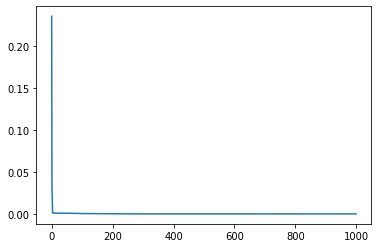

In [26]:
plt.plot(one[0]["result"]["loss"])
plt.show()

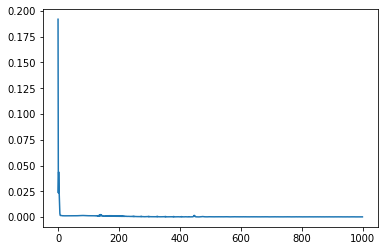

In [27]:
#plt.figure(figsize=(10,5))
plt.plot(one[1]["result"]["loss"])
plt.show()

In [28]:
def someplotter(rez_list):
    rowz = len(rez_list)
    rowzstr = str(rowz)
    plt.figure(figsize=(9,5))
    if rowz < 10:
        for r in range(1,rowz+1):
            subpstr = rowzstr + '1' + str(r)
            subpint =int(subpstr)
            plt.subplot(subpint)
            plt.plot(rez_list[r-1]["result"]["loss"])
        plt.show()
    else:
        for r in range(1,rowz+1):
            plt.subplot(rowz,1,r)
            plt.plot(rez_list[r-1]["result"]["loss"])
        plt.show()

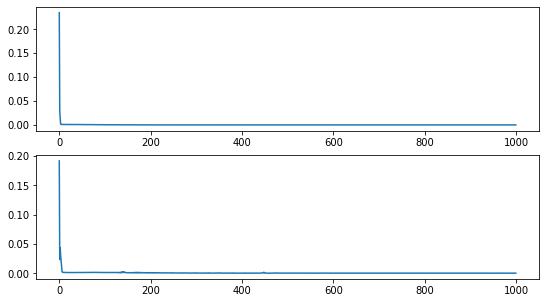

In [29]:
someplotter(one)

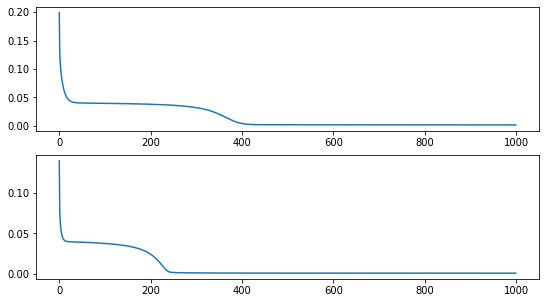

In [30]:
someplotter(two)

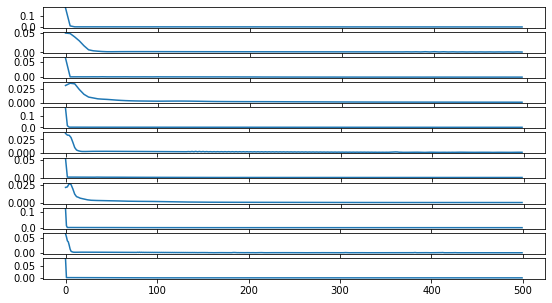

In [31]:
someplotter(three)

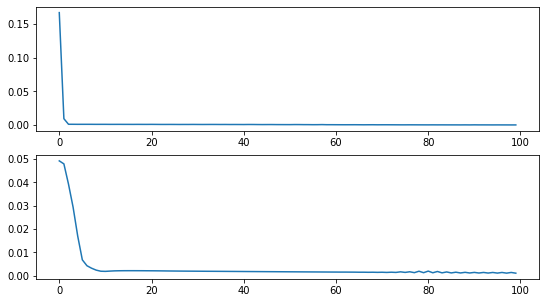

In [32]:
someplotter(three[:2])

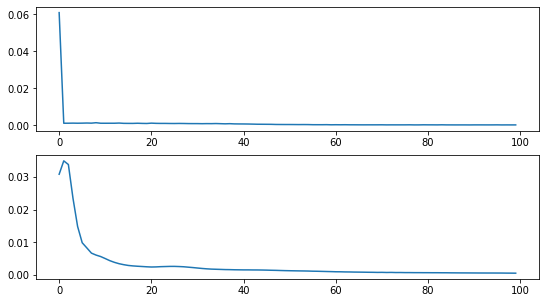

In [33]:
someplotter(three[2:4])

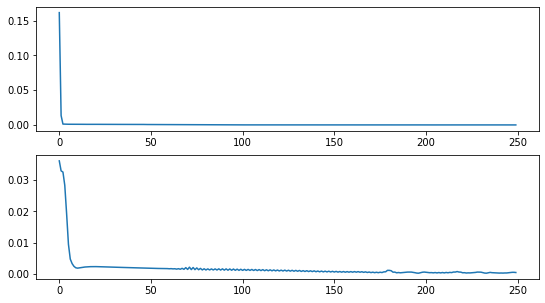

In [34]:
someplotter(three[4:6])

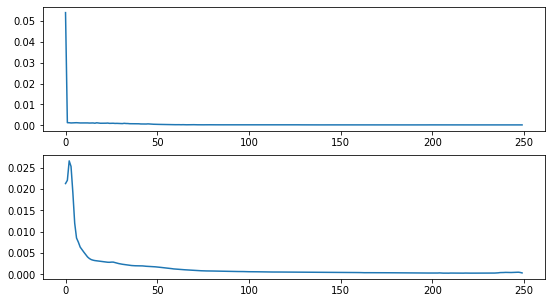

In [35]:
someplotter(three[6:8])

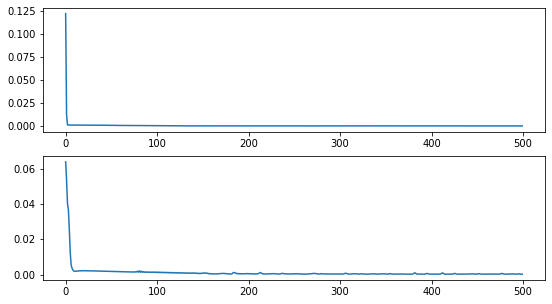

In [36]:
someplotter(three[8:10])

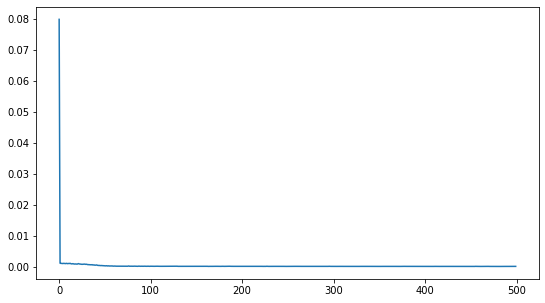

In [37]:
someplotter(three[10:])

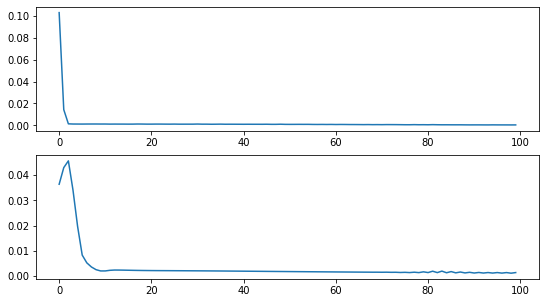

In [38]:
someplotter(four)

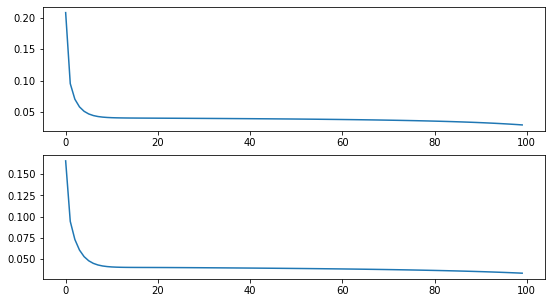

In [39]:
someplotter(five)

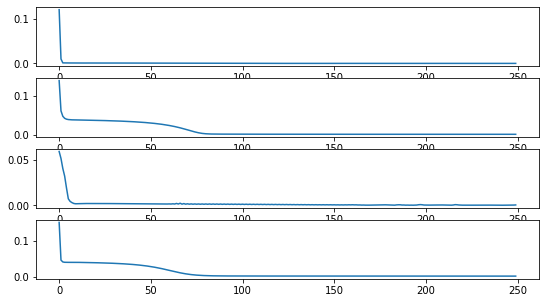

In [40]:
someplotter(six)

In [41]:
for num in rdl:
    for variant in num:
        last_loss = variant["result"]["loss"][-1]
        ep = variant["epochs"]
        print(ep,'\t',last_loss)
    print('----')

1000 	 0.0001861226910447837
1000 	 0.00024123324084951675
----
1000 	 0.0014036774505452306
1000 	 0.0012325506298895004
----
100 	 0.00027788812426914365
100 	 0.0010880870727680795
100 	 0.00023374846055033684
100 	 0.0005485799737840299
250 	 0.00020161080085780018
250 	 0.000452850172973815
250 	 0.00020628268895553587
250 	 0.00035903176065181264
500 	 0.00018815563432833873
500 	 0.00019662967042977501
500 	 0.00020203913535393327
----
100 	 0.0003631649479898547
100 	 0.0014373476736335138
----
100 	 0.02900854037097185
100 	 0.03311600047624716
----
250 	 0.00020312136602004
250 	 0.0012295897331599012
250 	 0.0005194907305357216
250 	 0.0010967436995781442
----


No real eveidence that a smaller batch size does much.  
Also models without shuffling don't do as well as identially models with shuffling.

In conclusion, we can stick to the 1000 epoch ones.  
Also 1000 epoch shuffle Adam batch size 32 wins

- ### Forecasts

In [42]:
import pandas as pd
import os
import numpy as np
import datetime
import inspect
import sys
import time

import tensorflow
sys.modules['keras'] = tensorflow.keras

from keras.models import Sequential
from keras.layers import LSTM

# requied to load saved model and training info
from keras.models import model_from_json

snpnormfile = "../Reuters Data Copy/SandP500/snp_normalized_lagged.csv"
snp_a_data = pd.read_csv(snpnormfile,parse_dates=['Local_Datetime'],
                         index_col=0)

snp_data_chrono = snp_a_data

y = snp_data_chrono['Close']
y_train = y.iloc[:1347-135]
y_validation = y.iloc[1347-135:]
X_train = snp_data_chrono.iloc[:1347-135,2:]
X_validation = snp_data_chrono.iloc[1347-135:,2:]

#### FIXED DATA SHAPE

# Annoyingly, we need a slightly different shape to our data
# in order to feed it into the LSTM
xtrainlen,xvallen = len(X_train), len(X_validation)
xtrain_array, x_validation_array = np.array(X_train), np.array(X_validation)
# change tp have shape len 9 1, instead of shape len 1 9
xtrain_shape = xtrain_array.reshape(xtrainlen,9,1)
xval_shape = x_validation_array.reshape(xvallen,9,1)

Z_train = xtrain_shape
Z_validation = xval_shape

/Users/revit/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [43]:
configs_list

{1: ('Lfix_20u_adam_32b_tf_results_01_jsconfig.json',
  'Lfix_20u_adam_32b_tf_results_02_jsconfig.json'),
 2: ('Lfix_20u_sgd_32b_tf_results_01_jsconfig.json',
  'Lfix_20u_sgd_32b_tf_results_02_jsconfig.json'),
 3: ('Lfix_mixepochs_20u_adam_168b_tf_results_01_jsconfig.json',
  'Lfix_mixepochs_20u_adam_168b_tf_results_02_jsconfig.json',
  'Lfix_mixepochs_20u_adam_168b_tf_results_03_jsconfig.json',
  'Lfix_mixepochs_20u_adam_168b_tf_results_04_jsconfig.json',
  'Lfix_mixepochs_20u_adam_168b_tf_results_05_jsconfig.json',
  'Lfix_mixepochs_20u_adam_168b_tf_results_06_jsconfig.json',
  'Lfix_mixepochs_20u_adam_168b_tf_results_07_jsconfig.json',
  'Lfix_mixepochs_20u_adam_168b_tf_results_08_jsconfig.json',
  'Lfix_mixepochs_20u_adam_168b_tf_results_09_jsconfig.json',
  'Lfix_mixepochs_20u_adam_168b_tf_results_10_jsconfig.json',
  'Lfix_mixepochs_20u_adam_168b_tf_results_11_jsconfig.json'),
 4: ('whocares_01_jsconfig.json', 'whocares_02_jsconfig.json'),
 5: ('whocares16sgd_01_jsconfig.json', '

In [44]:
model_weights_list

{1: ('Lfix_20u_adam_32b_tf_results_01_weights.h5',
  'Lfix_20u_adam_32b_tf_results_02_weights.h5'),
 2: ('Lfix_20u_sgd_32b_tf_results_01_weights.h5',
  'Lfix_20u_sgd_32b_tf_results_02_weights.h5'),
 3: ('Lfix_mixepochs_20u_adam_168b_tf_results_01_weights.h5',
  'Lfix_mixepochs_20u_adam_168b_tf_results_02_weights.h5',
  'Lfix_mixepochs_20u_adam_168b_tf_results_03_weights.h5',
  'Lfix_mixepochs_20u_adam_168b_tf_results_04_weights.h5',
  'Lfix_mixepochs_20u_adam_168b_tf_results_05_weights.h5',
  'Lfix_mixepochs_20u_adam_168b_tf_results_06_weights.h5',
  'Lfix_mixepochs_20u_adam_168b_tf_results_07_weights.h5',
  'Lfix_mixepochs_20u_adam_168b_tf_results_08_weights.h5',
  'Lfix_mixepochs_20u_adam_168b_tf_results_09_weights.h5',
  'Lfix_mixepochs_20u_adam_168b_tf_results_10_weights.h5',
  'Lfix_mixepochs_20u_adam_168b_tf_results_11_weights.h5'),
 4: ('whocares_01_weights.h5', 'whocares_02_weights.h5'),
 5: ('whocares16sgd_01_weights.h5', 'whocares16sgd_02_weights.h5'),
 6: ('250AS16TF_01_weig

- Given the config filename and weights filename, reload and weight the model

In [45]:
from keras.models import model_from_json

In [46]:
def get_trained_model_back(design,learnings):
    stored_model_info = open(design,'r')
    loaded_model_info = stored_model_info.read()
    stored_model_info.close()
    loaded_model = model_from_json(loaded_model_info)
    #return loaded_model
    loaded_model.load_weights(learnings)
    return loaded_model

In [47]:
#### 1
adam_1000_20u_32b_t = get_trained_model_back(configs_list[1][0],
                                             model_weights_list[1][0])
adam_1000_20u_32b_f = get_trained_model_back(configs_list[1][1],
                                             model_weights_list[1][1])
#### 2
sgd_1000_20u_32b_t = get_trained_model_back(configs_list[2][0],
                                      model_weights_list[2][0])
sgd_1000_20u_32b_f = get_trained_model_back(configs_list[2][1],
                                      model_weights_list[2][1])
#### 3
adam_100_20u_16_t = get_trained_model_back(configs_list[3][0],
                                      model_weights_list[3][0])
adam_100_20u_16_f = get_trained_model_back(configs_list[3][1],
                                      model_weights_list[3][1])
adam_100_20u_08_t = get_trained_model_back(configs_list[3][2],
                                      model_weights_list[3][2])
adam_100_20u_08_f = get_trained_model_back(configs_list[3][3],
                                      model_weights_list[3][3])
##
adam_250_20u_16_t = get_trained_model_back(configs_list[3][4],
                                      model_weights_list[3][4])
adam_250_20u_16_f = get_trained_model_back(configs_list[3][5],
                                      model_weights_list[3][5])
adam_250_20u_08_t = get_trained_model_back(configs_list[3][6],
                                      model_weights_list[3][6])
adam_250_20u_08_f = get_trained_model_back(configs_list[3][7],
                                      model_weights_list[3][7])
##
adam_500_20u_16_t = get_trained_model_back(configs_list[3][8],
                                      model_weights_list[3][8])
adam_500_20u_16_f = get_trained_model_back(configs_list[3][9],
                                      model_weights_list[3][9])
adam_500_20u_08_t = get_trained_model_back(configs_list[3][10],
                                      model_weights_list[3][10])


W1026 22:03:03.480834 140735832941504 deprecation.py:506] From /Users/revit/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1026 22:03:03.482430 140735832941504 deprecation.py:506] From /Users/revit/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1026 22:03:03.487075 140735832941504 deprecation.py:506] From /Users/revit/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Orthogonal.__init__ (from 

In [48]:
#### 4
adam_100_20u_16_t_mdl4 = get_trained_model_back(configs_list[4][0],
                                      model_weights_list[4][0])
adam_100_20u_16_f_mdl4 = get_trained_model_back(configs_list[4][1],
                                      model_weights_list[4][1])

#### 5
sgd_100_20u_16_t_mdl4 = get_trained_model_back(configs_list[5][0],
                                      model_weights_list[5][0])
sgd_100_20u_16_f_mdl4 = get_trained_model_back(configs_list[5][1],
                                      model_weights_list[5][1])

#### 6
adam_250_20u_16_t_mdl6 = get_trained_model_back(configs_list[6][0],
                                      model_weights_list[6][0])
sgd_250_20u_16_t_mdl6 = get_trained_model_back(configs_list[6][1],
                                      model_weights_list[6][1])
adam_250_20u_16_f_mdl6 = get_trained_model_back(configs_list[6][2],
                                      model_weights_list[6][2])
sgd_250_20u_16_f_mdl6 = get_trained_model_back(configs_list[6][3],
                                      model_weights_list[6][3])


### $\star~\star~\star$ Aside

## function `one_res_repr` was defined here. Moved to above.

`def one_res_repr(rez_dict):
    j = ["compil","config","epochs","setngs"]
    d = {}
    for jj in j: d[jj] = rez_dict[jj]
    d["result"] = {"last_loss":rez_dict["result"]["loss"][-1],
                   "min_loss":min(rez_dict["result"]["loss"])}
    return d`

In [49]:
one_res_repr(one[1])

{'compil': {'batchsize': 32, 'shuffled': False},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 1000,
 'result': {'last_loss': 0.00024123324084951675,
  'min_loss': 0.0002008843882919578},
 'setngs': {'optimization': 'adam'}}

In [50]:
one_res_repr(two[0])

{'compil': {'batchsize': 32, 'shuffled': True},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 1000,
 'result': {'last_loss': 0.0014036774505452306,
  'min_loss': 0.0014036774505452306},
 'setngs': {'optimization': 'sgd'}}

In [51]:
one_res_repr(two[1])

{'compil': {'batchsize': 32, 'shuffled': False},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 1000,
 'result': {'last_loss': 0.0012325506298895004,
  'min_loss': 0.0012325506298895004},
 'setngs': {'optimization': 'sgd'}}

In [52]:
one_res_repr(five[0])

{'compil': {'batchsize': 16, 'shuffled': True},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 100,
 'result': {'last_loss': 0.02900854037097185, 'min_loss': 0.02900854037097185},
 'setngs': {'optimization': 'sgd'}}

In [53]:
one_res_repr(five[1])

{'compil': {'batchsize': 16, 'shuffled': False},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 100,
 'result': {'last_loss': 0.03311600047624716, 'min_loss': 0.03311600047624716},
 'setngs': {'optimization': 'sgd'}}

In [54]:
one_res_repr(six[1])

{'compil': {'batchsize': 16, 'shuffled': True},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 250,
 'result': {'last_loss': 0.0012295897331599012,
  'min_loss': 0.001227053000650095},
 'setngs': {'optimization': 'sgd'}}

In [55]:
one_res_repr(six[3])

{'compil': {'batchsize': 16, 'shuffled': False},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 250,
 'result': {'last_loss': 0.0010967436995781442,
  'min_loss': 0.0010967436995781442},
 'setngs': {'optimization': 'sgd'}}

### $\star~\star~\star$ End Aside

- ### Now recomplile each one with the right optimizer

In [56]:
# .compile(loss='MSE', optimizer='adam', metrics=['mape'])
adam_models = (adam_1000_20u_32b_t,adam_1000_20u_32b_f,
               adam_100_20u_16_t, adam_100_20u_16_f,
               adam_100_20u_08_t, adam_100_20u_08_f,
               adam_250_20u_16_t, adam_250_20u_16_f,
               adam_250_20u_08_t, adam_250_20u_08_f,
               adam_500_20u_16_t, adam_500_20u_16_f,
               adam_500_20u_08_t,
               adam_100_20u_16_t_mdl4, adam_100_20u_16_f_mdl4,
               adam_250_20u_16_t_mdl6, adam_250_20u_16_f_mdl6)
sgd_models = (sgd_1000_20u_32b_t, sgd_1000_20u_32b_f,
              sgd_100_20u_16_t_mdl4, sgd_100_20u_16_f_mdl4,
             sgd_250_20u_16_t_mdl6, sgd_250_20u_16_f_mdl6)

In [57]:
adam_model_names = ("adam_1000_20u_32b_t", "adam_1000_20u_32b_f",
               "adam_100_20u_16_t", "adam_100_20u_16_f",
               "adam_100_20u_08_t", "adam_100_20u_08_f",
               "adam_250_20u_16_t", "adam_250_20u_16_f",
               "adam_250_20u_08_t", "adam_250_20u_08_f",
               "adam_500_20u_16_t", "adam_500_20u_16_f",
               "adam_500_20u_08_t",
               "adam_100_20u_16_t_mdl4", "adam_100_20u_16_f_mdl4",
               "adam_250_20u_16_t_mdl6", "adam_250_20u_16_f_mdl6")
sgd_model_names = ("sgd_1000_20u_32b_t", "sgd_1000_20u_32b_f",
              "sgd_100_20u_16_t_mdl4", "sgd_100_20u_16_f_mdl4",
             "sgd_250_20u_16_t_mdl6", "sgd_250_20u_16_f_mdl6")

In [58]:
for mdl in adam_models:
    mdl.compile(loss="MSE",optimizer="adam", metrics=["mape"])

In [59]:
for mdl in sgd_models:
    mdl.compile(loss="MSE",optimizer="sgd", metrics=["mape"])

- ### Now run the scoring on the models for the Validation Set

In [60]:
adam_model_scores = tuple(mdl.evaluate(Z_validation, 
                                       y_validation,verbose=0) 
                     for mdl in adam_models)

In [61]:
adam_model_scores

([0.0002097371022467053, 1.3459352],
 [0.0002049266871634043, 1.2716554],
 [0.0008240894155783785, 2.5515902],
 [0.0003261509282445466, 1.5955615],
 [8.232207964519384e-05, 0.7857687],
 [7.303063865509574e-05, 0.70235246],
 [0.0004972081747837365, 1.8600303],
 [0.00018724693778764318, 1.1974376],
 [0.00032763535618195654, 1.7292316],
 [0.00015265993769625547, 1.0793744],
 [0.000387614379266139, 1.8384361],
 [0.00015931574776509983, 1.1371323],
 [0.00010117247584275901, 0.86920404],
 [0.0008139149863617839, 2.4771152],
 [0.0006302857439516595, 2.2353885],
 [0.00033759194732367717, 1.7390037],
 [8.129901899438766e-05, 0.6954425])

In [62]:
for x,y in zip(adam_model_names, adam_model_scores):
    print(x,'\t',y)

adam_1000_20u_32b_t 	 [0.0002097371022467053, 1.3459352]
adam_1000_20u_32b_f 	 [0.0002049266871634043, 1.2716554]
adam_100_20u_16_t 	 [0.0008240894155783785, 2.5515902]
adam_100_20u_16_f 	 [0.0003261509282445466, 1.5955615]
adam_100_20u_08_t 	 [8.232207964519384e-05, 0.7857687]
adam_100_20u_08_f 	 [7.303063865509574e-05, 0.70235246]
adam_250_20u_16_t 	 [0.0004972081747837365, 1.8600303]
adam_250_20u_16_f 	 [0.00018724693778764318, 1.1974376]
adam_250_20u_08_t 	 [0.00032763535618195654, 1.7292316]
adam_250_20u_08_f 	 [0.00015265993769625547, 1.0793744]
adam_500_20u_16_t 	 [0.000387614379266139, 1.8384361]
adam_500_20u_16_f 	 [0.00015931574776509983, 1.1371323]
adam_500_20u_08_t 	 [0.00010117247584275901, 0.86920404]
adam_100_20u_16_t_mdl4 	 [0.0008139149863617839, 2.4771152]
adam_100_20u_16_f_mdl4 	 [0.0006302857439516595, 2.2353885]
adam_250_20u_16_t_mdl6 	 [0.00033759194732367717, 1.7390037]
adam_250_20u_16_f_mdl6 	 [8.129901899438766e-05, 0.6954425]


In [63]:
sgd_model_scores = tuple(mdl.evaluate(Z_validation, 
                                      y_validation,verbose=0) 
                     for mdl in sgd_models)

In [64]:
sgd_model_scores

([0.005046067962905875, 7.193166],
 [0.0024392331277744636, 4.8968377],
 [0.08359070492011529, 29.982258],
 [0.08243069565958447, 29.766888],
 [0.0034880548681098, 5.9305086],
 [0.0027829998448767046, 5.2009625])

In [65]:
for x,y in zip(sgd_model_names, sgd_model_scores):
    print(x,'\t',y)

sgd_1000_20u_32b_t 	 [0.005046067962905875, 7.193166]
sgd_1000_20u_32b_f 	 [0.0024392331277744636, 4.8968377]
sgd_100_20u_16_t_mdl4 	 [0.08359070492011529, 29.982258]
sgd_100_20u_16_f_mdl4 	 [0.08243069565958447, 29.766888]
sgd_250_20u_16_t_mdl6 	 [0.0034880548681098, 5.9305086]
sgd_250_20u_16_f_mdl6 	 [0.0027829998448767046, 5.2009625]


### - having them by adam or sgd got confusing. I will put them based on the test batch

In [66]:
ordered_models = {
    1: (adam_1000_20u_32b_t, adam_1000_20u_32b_f),
    
    2: (sgd_1000_20u_32b_t, sgd_1000_20u_32b_f),
    
    3: (adam_100_20u_16_t, adam_100_20u_16_f,
        adam_100_20u_08_t, adam_100_20u_08_f,
        adam_250_20u_16_t, adam_250_20u_16_f,
        adam_250_20u_08_t, adam_250_20u_08_f,
        adam_500_20u_16_t, adam_500_20u_16_f,
        adam_500_20u_08_t
       ),
    
    4: (adam_100_20u_16_t_mdl4, adam_100_20u_16_f_mdl4),
    
    5: ( sgd_100_20u_16_t_mdl4, sgd_100_20u_16_f_mdl4),
    
    6: (adam_250_20u_16_t_mdl6, sgd_250_20u_16_t_mdl6,
        adam_250_20u_16_f_mdl6, sgd_250_20u_16_f_mdl6)
}

In [67]:
#ordered_models.keys() # dict_keys([1, 2, 3, 4, 5, 6])
ordered_evals = {k:tuple(mdl.evaluate(Z_validation,
                                      y_validation,
                                      verbose=0)
                        for mdl in ordered_models[k])
                 for k in ordered_models.keys()
                }

In [68]:
ordered_evals

{1: ([0.0002097371022467053, 1.3459352], [0.0002049266871634043, 1.2716554]),
 2: ([0.005046067962905875, 7.193166], [0.0024392331277744636, 4.8968377]),
 3: ([0.0008240894155783785, 2.5515902],
  [0.0003261509282445466, 1.5955615],
  [8.232207964519384e-05, 0.7857687],
  [7.303063865509574e-05, 0.70235246],
  [0.0004972081747837365, 1.8600303],
  [0.00018724693778764318, 1.1974376],
  [0.00032763535618195654, 1.7292316],
  [0.00015265993769625547, 1.0793744],
  [0.000387614379266139, 1.8384361],
  [0.00015931574776509983, 1.1371323],
  [0.00010117247584275901, 0.86920404]),
 4: ([0.0008139149863617839, 2.4771152], [0.0006302857439516595, 2.2353885]),
 5: ([0.08359070492011529, 29.982258], [0.08243069565958447, 29.766888]),
 6: ([0.00033759194732367717, 1.7390037],
  [0.0034880548681098, 5.9305086],
  [8.129901899438766e-05, 0.6954425],
  [0.0027829998448767046, 5.2009625])}

In [69]:
8.129901899438766e-05

8.129901899438766e-05

In [70]:
8.129901899438766e-05 * 10

0.0008129901899438766

- one-off model #1

In [71]:
a85f = open("adam_8_500_false_results_01_jsconfig.json")
a85f_r = a85f.read()
a85f.close()
a85f_model = model_from_json(a85f_r)
a85f_model.load_weights("adam_8_500_false_results_01_weights.h5")
a85f_model.compile(loss="MSE",optimizer="adam", metrics=["mape"])
a85f_scores = a85f_model.evaluate(Z_validation, y_validation,verbose=0)

print("adam_500_20u_08_f",'\t',a85f_scores)

adam_500_20u_08_f 	 [7.959138364876035e-05, 0.72921026]


In [72]:
seven = result_dictionary("adam_8_500_false_results.txt")

text len:  23428
split text len:  2
last item in the split:  ''
split text len:  1


dict len:  1
dictionary keys:  dict_keys(['epochs', 'config', 'result', 'setngs', 'compil'])
1st item config:  {'layers': 3, 'layer': {1: 20, 2: 20, 3: 20}}
1st item min loss:  0.0001640368008887854
1st item last loss:  0.00018081604928726664


- __one-off model #2__

In [73]:
a8_1k_f = open("adam_1000_8b_f_results_01_jsconfig.json")
a8_1k_f_r = a8_1k_f.read()
a8_1k_f.close()
a8_1k_f_model = model_from_json(a8_1k_f_r)

a8_1k_f_model.load_weights("adam_1000_8b_f_results_01_weights.h5")
a8_1k_f_model.compile(loss="MSE",optimizer="adam", metrics=["mape"])
a8_1k_f_scores = a8_1k_f_model.evaluate(Z_validation, y_validation,verbose=0)

print("adam_1000_20u_08_f",'\t',a8_1k_f_scores)

adam_1000_20u_08_f 	 [0.00046911216729010147, 1.806251]


In [74]:
eight = result_dictionary("adam_1000_8b_f_results.txt")

text len:  46975
split text len:  2
last item in the split:  ''
split text len:  1


dict len:  1
dictionary keys:  dict_keys(['epochs', 'config', 'result', 'setngs', 'compil'])
1st item config:  {'layers': 3, 'layer': {1: 20, 2: 20, 3: 20}}
1st item min loss:  0.0001000993898403124
1st item last loss:  0.0001215666384163786


In [75]:
one_res_repr(three[2])

{'compil': {'batchsize': 8, 'shuffled': True},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 100,
 'result': {'last_loss': 0.00023374846055033684,
  'min_loss': 0.00021878075839484051},
 'setngs': {'optimization': 'adam'}}

In [76]:
one_res_repr(three[3])

{'compil': {'batchsize': 8, 'shuffled': False},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 100,
 'result': {'last_loss': 0.0005485799737840299,
  'min_loss': 0.0005485799737840299},
 'setngs': {'optimization': 'adam'}}

In [77]:
one_res_repr(three[5])

{'compil': {'batchsize': 16, 'shuffled': False},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 250,
 'result': {'last_loss': 0.000452850172973815,
  'min_loss': 0.00023894384544186767},
 'setngs': {'optimization': 'adam'}}

In [78]:
one_res_repr(six[2])

{'compil': {'batchsize': 16, 'shuffled': False},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 250,
 'result': {'last_loss': 0.0005194907305357216,
  'min_loss': 0.0002209127735065699},
 'setngs': {'optimization': 'adam'}}

In [79]:
one_res_repr(seven[0])

{'compil': {'batchsize': 8, 'shuffled': False},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 500,
 'result': {'last_loss': 0.00018081604928726664,
  'min_loss': 0.0001640368008887854},
 'setngs': {'optimization': 'adam'}}

In [80]:
one_res_repr(eight[0])

{'compil': {'batchsize': 8, 'shuffled': False},
 'config': {'layer': {1: 20, 2: 20, 3: 20}, 'layers': 3},
 'epochs': 1000,
 'result': {'last_loss': 0.0001215666384163786,
  'min_loss': 0.0001000993898403124},
 'setngs': {'optimization': 'adam'}}

- ### Now for some predictions

In [81]:
top_models = (adam_100_20u_08_t,
              adam_100_20u_08_f,
              adam_250_20u_16_f_mdl6,
              a85f_model,
              adam_250_20u_16_f)
y_targets_array = np.array(y_validation)
testpred_list = tuple(mdl.predict(Z_validation) for mdl in top_models)

In [82]:
adam_1000_8b_f_prediction = a8_1k_f_model.predict(Z_validation)

In [83]:
testpred_list[0][:5]

array([[0.90577346],
       [0.9193313 ],
       [0.92094934],
       [0.92206126],
       [0.9219867 ]], dtype=float32)

In [84]:
y_targets_array[:10]

array([0.91563932, 0.92070953, 0.92159645, 0.92174427, 0.92331116,
       0.92002956, 0.92909091, 0.94711013, 0.95067258, 0.94187731])

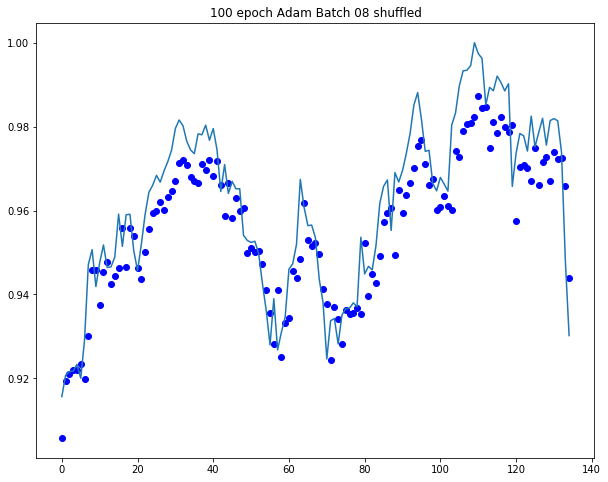

In [85]:
plt.figure(figsize=(10,8))
plt.plot(testpred_list[0], 'bo')
plt.plot(y_targets_array)
plt.title("100 epoch Adam Batch 08 shuffled")
plt.show()

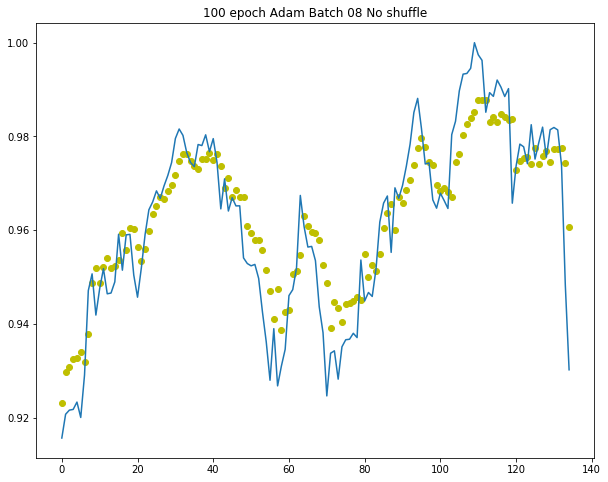

In [86]:
plt.figure(figsize=(10,8))
plt.plot(testpred_list[1], 'yo')
plt.plot(y_targets_array)
plt.title("100 epoch Adam Batch 08 No shuffle")
plt.show()

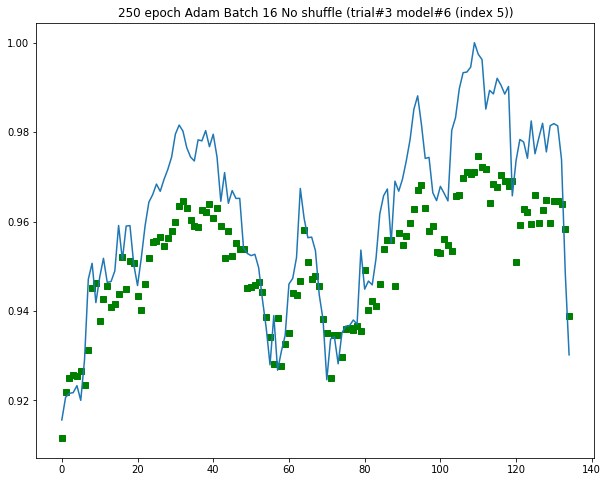

In [87]:
plt.figure(figsize=(10,8))
plt.plot(testpred_list[4], 'gs')
plt.plot(y_targets_array)
plt.title("250 epoch Adam Batch 16 No shuffle (trial#3 model#6 (index 5))")
plt.show()

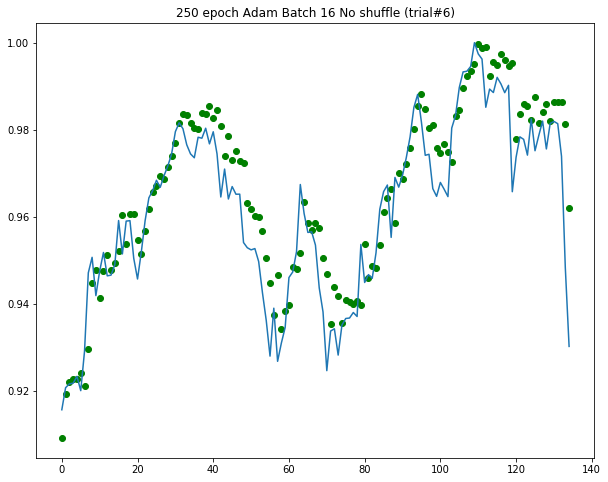

In [88]:
plt.figure(figsize=(10,8))
plt.plot(testpred_list[2], 'go')
plt.plot(y_targets_array)
plt.title("250 epoch Adam Batch 16 No shuffle (trial#6)")
plt.show()

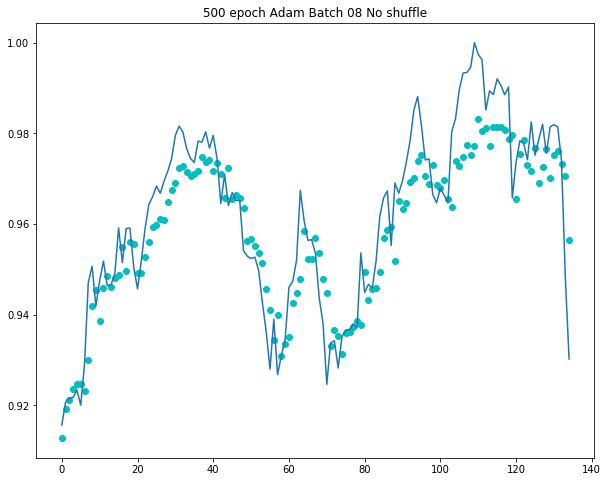

In [89]:
plt.figure(figsize=(10,8))
plt.plot(testpred_list[3], 'co')
plt.plot(y_targets_array)
plt.title("500 epoch Adam Batch 08 No shuffle")
plt.show()

one other things we can conclusively save now, is that shuffling was NOT useful for the models.  
Even when all other items were kept the same, the model withou shuffling performed better with regard to MSE minimization and MAPE on the validation set.

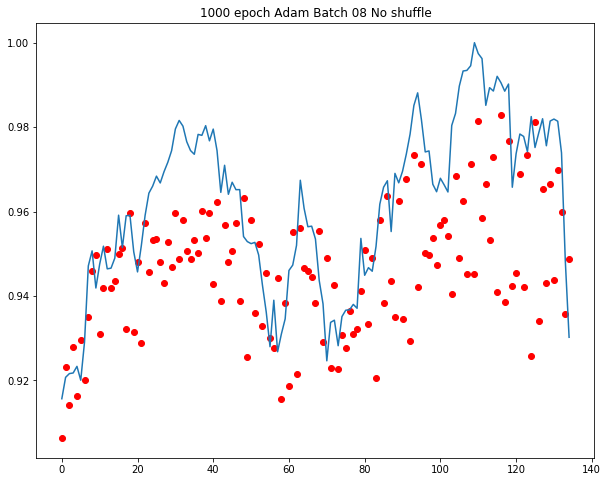

In [90]:
plt.figure(figsize=(10,8))
plt.plot(adam_1000_8b_f_prediction, 'ro')
plt.plot(y_targets_array)
plt.title("1000 epoch Adam Batch 08 No shuffle")
plt.show()

Wow. So if we go for 1000 epochs with the mini-batch 8 LSTM using adam, then we get overfitting.


<hr>

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<hr>

# Extras for Write Up

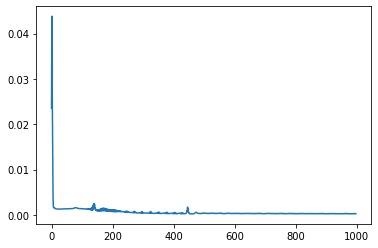

In [91]:
plt.plot(one[1]["result"]["loss"][1:])
plt.show()

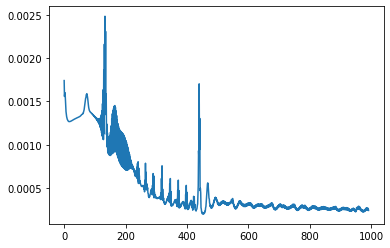

In [92]:
plt.plot(one[1]["result"]["loss"][7:])
plt.show()

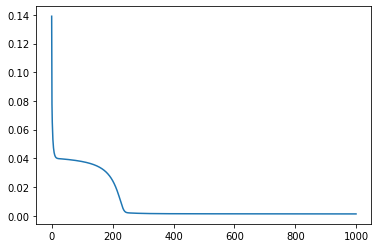

In [93]:
plt.plot(two[1]["result"]["loss"][0:])
plt.show()

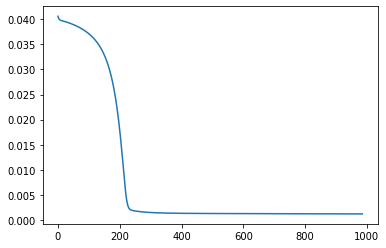

In [94]:
plt.plot(two[1]["result"]["loss"][14:])
plt.show()

To evaluate and get scores an predictions on any model, call them for the ordered models variable

run the predict function on the model using Z validation

plot the prediction against the y_validation using the y_tragets array

In [95]:
ordered_models

{1: (<tensorflow.python.keras.engine.sequential.Sequential at 0x12c2d2278>,
  <tensorflow.python.keras.engine.sequential.Sequential at 0x1832604fd0>),
 2: (<tensorflow.python.keras.engine.sequential.Sequential at 0x18330c1be0>,
  <tensorflow.python.keras.engine.sequential.Sequential at 0x1833b77eb8>),
 3: (<tensorflow.python.keras.engine.sequential.Sequential at 0x183462a7b8>,
  <tensorflow.python.keras.engine.sequential.Sequential at 0x183bbcba20>),
 4: (<tensorflow.python.keras.engine.sequential.Sequential at 0x1830dfe2e8>,
  <tensorflow.python.keras.engine.sequential.Sequential at 0x183b3a5c50>),
 5: (<tensorflow.python.keras.engine.sequential.Sequential at 0x183d7d6ef0>,
  <tensorflow.python.keras.engine.sequential.Sequential at 0x183d0be208>),
 6: (<tensorflow.python.keras.engine.sequential.Sequential at 0x183ddf54a8>,
  <tensorflow.python.keras.engine.sequential.Sequential at 0x183f51bb38>)}

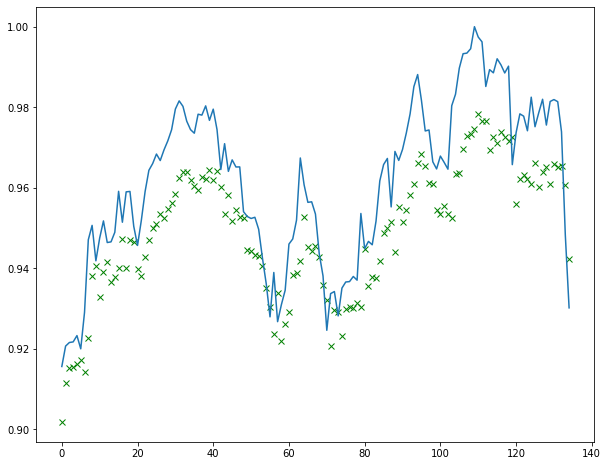

In [96]:
#om_1i1_predict = ordered_models[1][0].predict(Z_validation)
plt.figure(figsize=(10,8))
plt.plot(ordered_models[1][0].predict(Z_validation), 'gx')
plt.plot(y_targets_array)
plt.show()

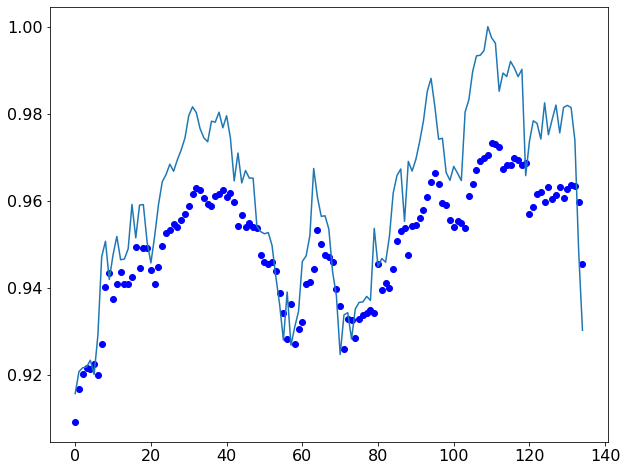

In [133]:
#om_1i1_predict = ordered_models[1][1].predict(Z_validation)
plt.figure(figsize=(10,8))
plt.plot(ordered_models[1][1].predict(Z_validation), 'bo')
plt.plot(y_targets_array)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

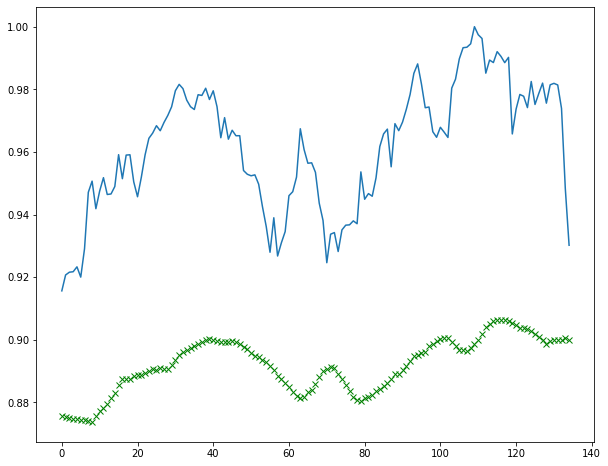

In [98]:
# om_1i1_predict = ordered_models[2][0].predict(Z_validation)
plt.figure(figsize=(10,8))
plt.plot(ordered_models[2][0].predict(Z_validation), 'gx')
plt.plot(y_targets_array)
plt.show()

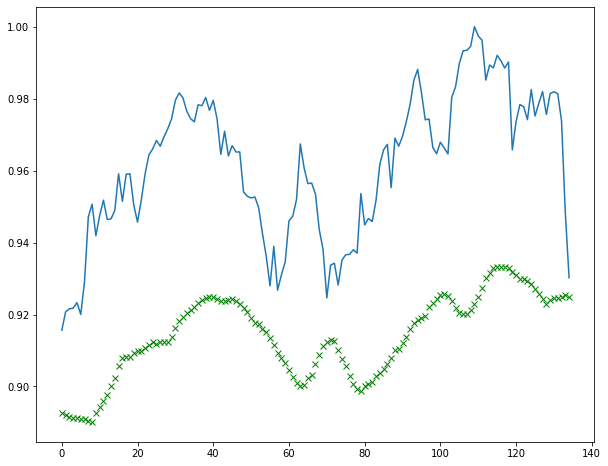

In [99]:
# om_1i1_predict = ordered_models[2][1].predict(Z_validation)
plt.figure(figsize=(10,8))
plt.plot(ordered_models[2][1].predict(Z_validation), 'gx')
plt.plot(y_targets_array)
plt.show()

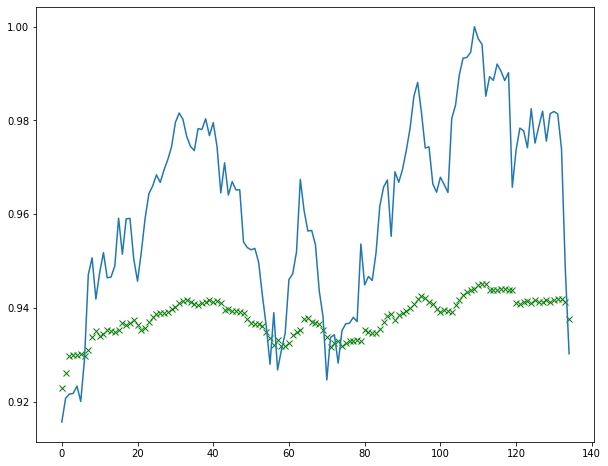

In [100]:
#om_1i1_predict = ordered_models[3][0].predict(Z_validation)
plt.figure(figsize=(10,8))
plt.plot(ordered_models[3][0].predict(Z_validation), 'gx')
plt.plot(y_targets_array)
plt.show()

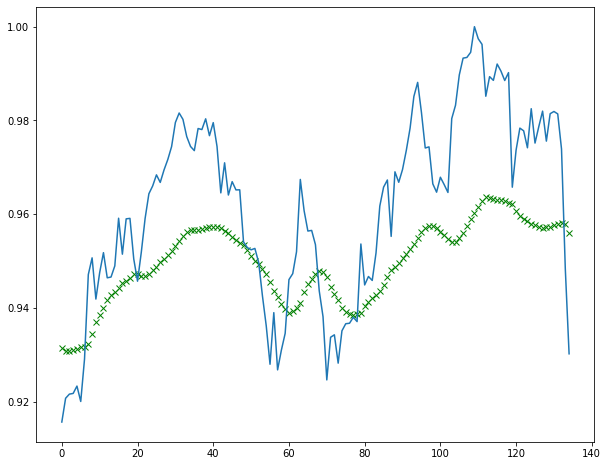

In [101]:
#om_1i1_predict = ordered_models[3][1].predict(Z_validation)
plt.figure(figsize=(10,8))
plt.plot(ordered_models[3][1].predict(Z_validation), 'gx')
plt.plot(y_targets_array)
plt.show()

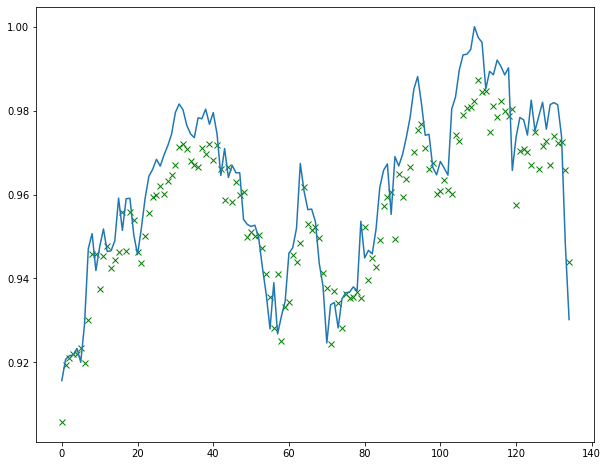

In [102]:
plt.figure(figsize=(10,8))
plt.plot(ordered_models[3][2].predict(Z_validation), 'gx')
plt.plot(y_targets_array)
plt.show()

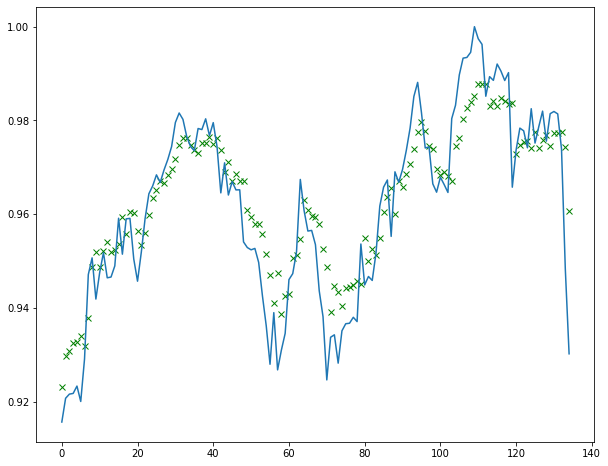

In [103]:
plt.figure(figsize=(10,8))
plt.plot(ordered_models[3][3].predict(Z_validation), 'gx')
plt.plot(y_targets_array)
plt.show()

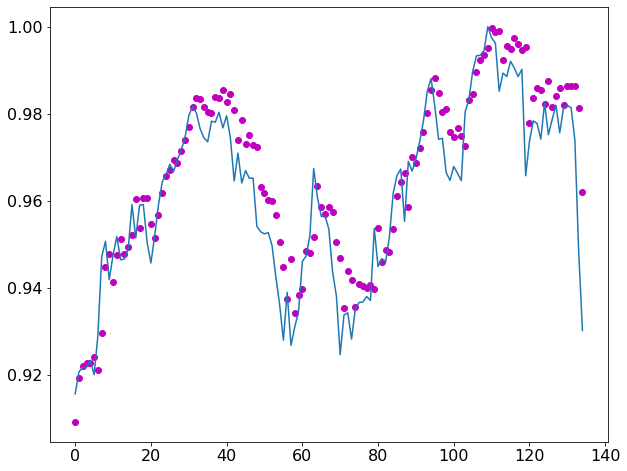

In [134]:
plt.figure(figsize=(10,8))
plt.plot(ordered_models[6][2].predict(Z_validation), 'mo')
plt.plot(y_targets_array)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

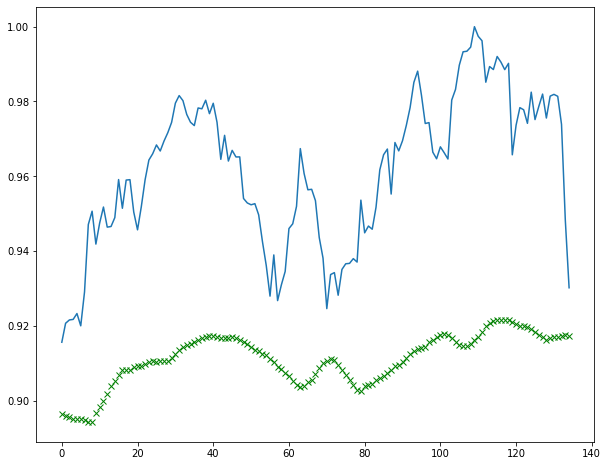

In [105]:
plt.figure(figsize=(10,8))
plt.plot(ordered_models[6][3].predict(Z_validation), 'gx')
plt.plot(y_targets_array)
plt.show()

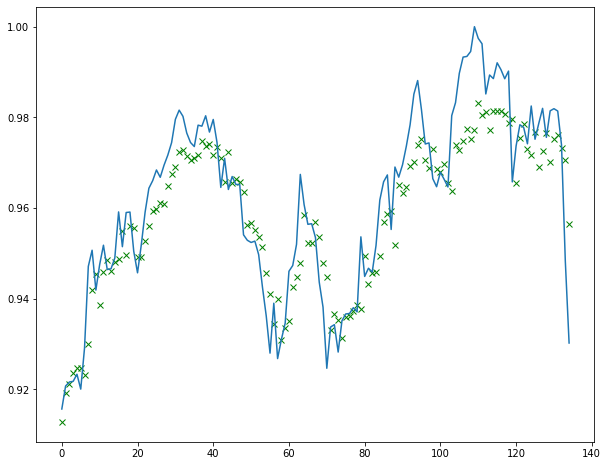

In [106]:
# model 7i0 is a85f_model
plt.figure(figsize=(10,8))
plt.plot(a85f_model.predict(Z_validation), 'gx')
plt.plot(y_targets_array)
plt.show()

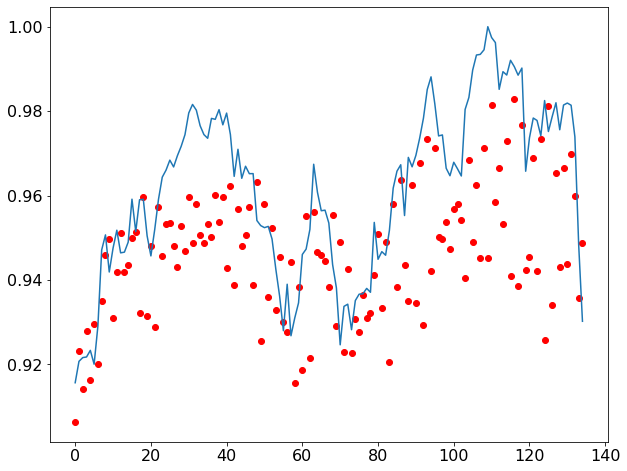

In [112]:
# model 8i0 is a8_1k_f_model
plt.figure(figsize=(10,8))
plt.plot(a8_1k_f_model.predict(Z_validation), 'ro')
plt.plot(y_targets_array)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()